In [11]:
import pandas as pd
#import tensorflow as tf
import numpy as np
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('features_flight_heli.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fname        6865 non-null   object 
 1   alt_max      6865 non-null   float64
 2   vert_acc     6865 non-null   float64
 3   horiz_speed  6865 non-null   float64
 4   dist         6865 non-null   float64
 5   is_maneuver  6865 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 321.9+ KB


In [13]:
df.drop(['fname'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alt_max      6865 non-null   float64
 1   vert_acc     6865 non-null   float64
 2   horiz_speed  6865 non-null   float64
 3   dist         6865 non-null   float64
 4   is_maneuver  6865 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 268.3 KB


In [14]:
df['is_maneuver'].value_counts()

1    5104
0    1761
Name: is_maneuver, dtype: int64

In [15]:
Y = df['is_maneuver']
X = df.drop(['is_maneuver'], axis=1)

print(X.shape)
print(Y.shape)

(6865, 4)
(6865,)


In [16]:
X = np.array(X)
#X = np.column_stack(('alt_max', 'vert_acc', 'horiz_speed', 'dist' ))

In [18]:
model = Sequential()
model.add(Dense(256, input_shape=(X.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization(synchronized=True))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization(synchronized=True))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               1280      
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

In [19]:

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [22]:
es = EarlyStopping(monitor='val_accuracy',mode='max', patience=10,restore_best_weights=True)

history = model.fit(X, Y,callbacks=[es],epochs=15,batch_size=10,validation_split=0.2,shuffle=True,verbose=1)

Epoch 1/15
550/550 [==============================] - 3s 5ms/step - loss: 0.4151 - accuracy: 0.8312 - val_loss: 0.4273 - val_accuracy: 0.8449
Epoch 2/15
550/550 [==============================] - 3s 5ms/step - loss: 0.4081 - accuracy: 0.8385 - val_loss: 0.4111 - val_accuracy: 0.8449
Epoch 3/15
550/550 [==============================] - 2s 4ms/step - loss: 0.4124 - accuracy: 0.8303 - val_loss: 0.4119 - val_accuracy: 0.8492
Epoch 4/15
550/550 [==============================] - 2s 4ms/step - loss: 0.4066 - accuracy: 0.8345 - val_loss: 0.4521 - val_accuracy: 0.8478
Epoch 5/15
550/550 [==============================] - 2s 4ms/step - loss: 0.4018 - accuracy: 0.8367 - val_loss: 0.4353 - val_accuracy: 0.8485
Epoch 6/15
550/550 [==============================] - 2s 4ms/step - loss: 0.4039 - accuracy: 0.8343 - val_loss: 0.4133 - val_accuracy: 0.8478
Epoch 7/15
550/550 [==============================] - 3s 6ms/step - loss: 0.4097 - accuracy: 0.8321 - val_loss: 0.5484 - val_accuracy: 0.7495
Epoch 

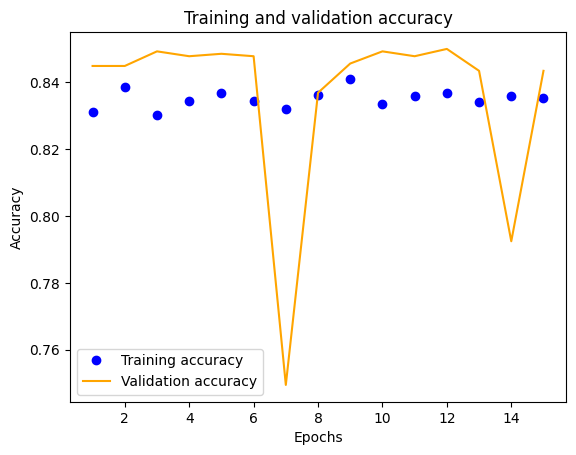

0.8499636054039001

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


np.max(val_acc)